# Stock Movement Prediction with Random Forest 
> ## Collaborators:
> Lim Jia Xiang<br>
> Ma Tianran<br>

### Import required python libraries 

In [1]:
import pandas as pd
from pandas.plotting import autocorrelation_plot, scatter_matrix
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, mean_squared_error, accuracy_score, f1_score, classification_report
from math import sqrt
import pandas_datareader.data as data

from time import sleep, strftime
from datetime import *

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import data using pandas_datareader and perform data preprocessing
Random Forest Dataset:
> stock_data will be the dataset that the RF model will be using. <br>
> Currently stock_data is in its raw form of having just open and adjusted close prices.
> Feature engineering will be performed later for the random forest model. 

In [2]:
start = datetime.now()- timedelta(days=730)
end = datetime.now()
stock_data = pd.DataFrame()
stock_data_ann = pd.DataFrame()

tickers = {'bitcoin':'GBTC', 'intel':'INTC', 'microsoft':'MSFT', 'amazon':'AMZN', 'alibaba':'BABA', 'baidu':'BIDU'}

for ticker in tickers:
    tmp = data.DataReader(tickers[ticker], 'yahoo', start, end)
    stock_data[ticker+'_open'] = tmp['Open']
    stock_data[ticker+'_close'] = tmp['Adj Close']
    # if loop is unable to complete then run time.sleep for delay
    # time.sleep(1)
    
    
# Convert all values to float32 to ensure type consistency
stock_data = stock_data.astype('float32')

# Sort dataframe by date
stock_data = stock_data.sort_index(axis=0,level=None,ascending=True)

# View first 5 rows of dataframe
stock_data.head()

,bitcoin_open,bitcoin_close,intel_open,intel_close,microsoft_open,microsoft_close,amazon_open,amazon_close,alibaba_open,alibaba_close,baidu_open,baidu_close
Date,,,,,,,,,,,,
2015-12-17,63.900002,62.000000,35.320000,32.864799,56.360001,53.028351,680.000000,670.650024,85.000000,83.559998,200.720001,196.940002
2015-12-18,62.500000,62.000000,34.730000,31.885723,55.770000,51.533657,668.650024,664.140015,83.199997,82.650002,195.539993,191.919998
2015-12-21,60.990002,59.950001,34.110001,32.234058,54.880001,52.200081,668.500000,664.510010,83.150002,82.870003,193.800003,197.440002
2015-12-22,60.000000,59.400002,34.360001,32.695347,54.990002,52.695137,666.830017,663.150024,82.889999,84.839996,198.089996,197.029999
2015-12-23,61.000000,60.000000,34.950001,32.949535,55.700001,53.142597,666.500000,663.700012,85.050003,84.800003,197.309998,196.529999


Obtain descriptive analytics of imported data

In [3]:
stock_data.describe()

,bitcoin_open,bitcoin_close,intel_open,intel_close,microsoft_open,microsoft_close,amazon_open,amazon_close,alibaba_open,alibaba_close,baidu_open,baidu_close
count,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,503.000000,503.000000,504.000000,504.000000
mean,281.912964,281.817688,35.326370,34.402485,63.021282,61.704319,824.358459,824.204956,111.393768,111.308533,187.989197,187.899643
std,372.833160,375.116333,3.620899,4.014803,9.680279,10.348557,162.120285,161.979446,36.806313,36.688686,27.259224,27.364208
min,41.110001,41.000000,27.830000,26.800566,48.680000,46.762909,478.010010,482.070007,60.110001,60.570000,140.610001,140.679993
25%,86.937500,87.000000,33.177500,31.752139,54.930000,52.456756,717.987503,719.242493,79.920002,80.674999,169.997501,169.820000
50%,110.000000,109.250000,35.315001,34.523596,62.389999,60.939304,809.429993,810.260010,101.860001,101.589996,178.785004,178.055000
75%,397.262505,399.932503,36.534999,35.787239,70.094997,69.305832,963.130020,964.967484,140.555000,139.455002,191.035000,191.697502
max,2550.000000,2699.000000,47.200001,46.822521,85.739998,86.849998,1204.880005,1195.829956,191.539993,191.190002,273.700012,272.820007


The open and close prices of the different stocks have vastly different ranges. Thus, we will have to scale them before feeding these features as inputs into the model.

In [4]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 504 entries, 2015-12-17 to 2017-12-15
Data columns (total 12 columns):
bitcoin_open       504 non-null float32
bitcoin_close      504 non-null float32
intel_open         504 non-null float32
intel_close        504 non-null float32
microsoft_open     504 non-null float32
microsoft_close    504 non-null float32
amazon_open        504 non-null float32
amazon_close       504 non-null float32
alibaba_open       503 non-null float32
alibaba_close      503 non-null float32
baidu_open         504 non-null float32
baidu_close        504 non-null float32
dtypes: float32(12)
memory usage: 27.6 KB


All columns have the same number of examples (504), this means that there is no null values and that we may proceed to carry out our exploratory data analysis (EDA)

## Exploratory Data Analysis (EDA)

In [5]:
%matplotlib inline

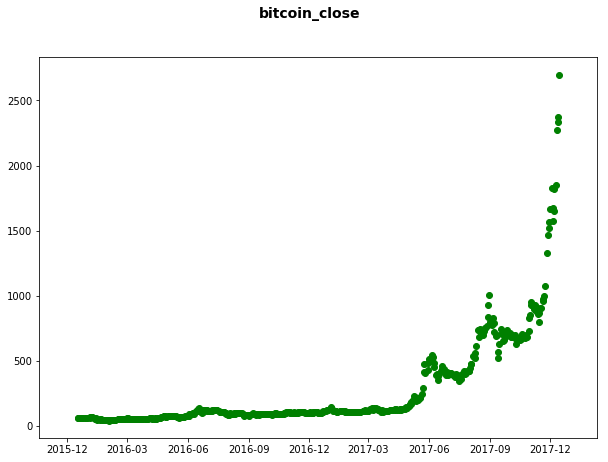

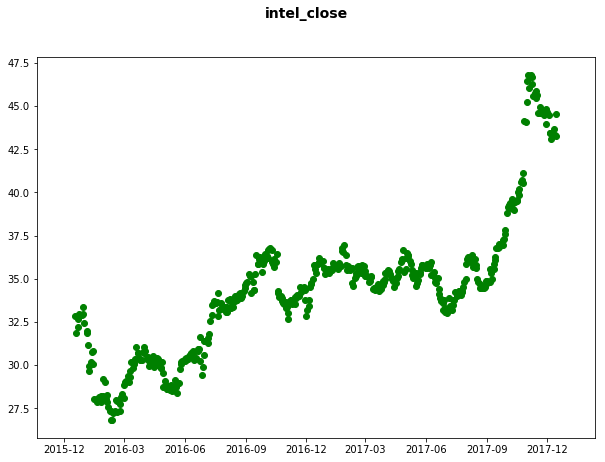

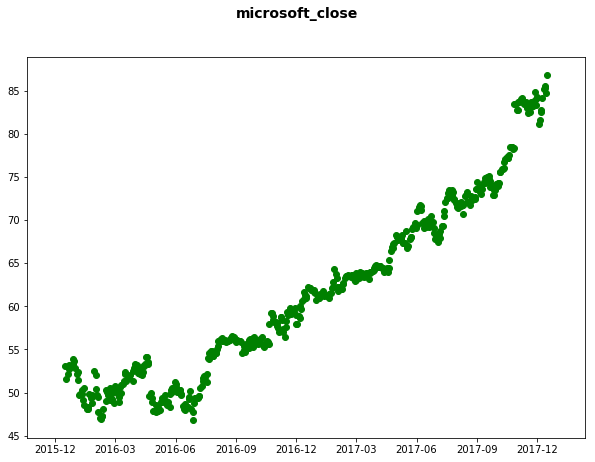

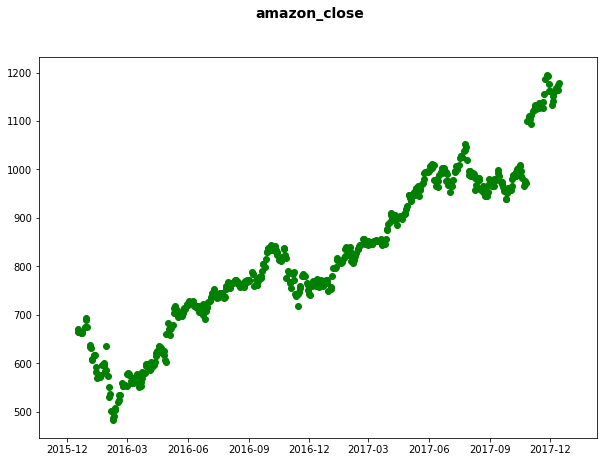

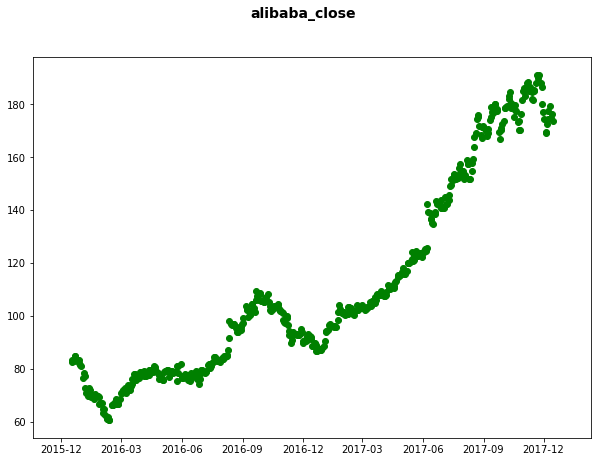

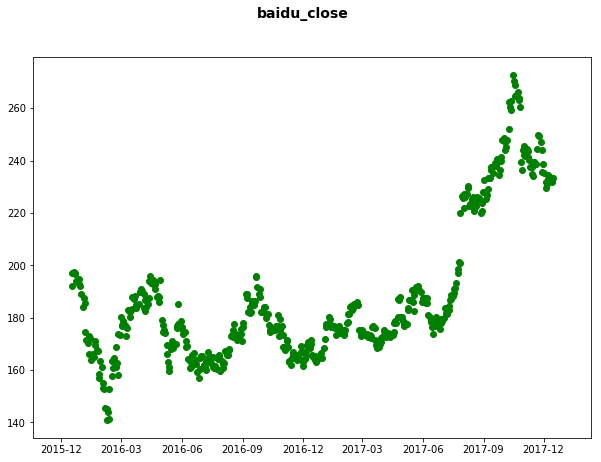

In [6]:
name_list_close = ['bitcoin_close', 'intel_close', 'microsoft_close', 'amazon_close', 'alibaba_close', 'baidu_close']
for i in name_list_close: 
    f, ax = plt.subplots(figsize=(10, 7))
    plt.scatter(x=stock_data.index, y=stock_data[i], c='g')
    plt.suptitle(i, fontsize=14, fontweight='bold')

An upward trend for majority of the stocks can be observed for 2017.

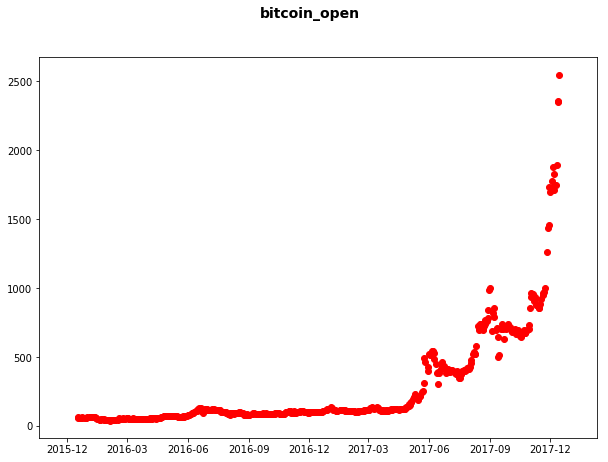

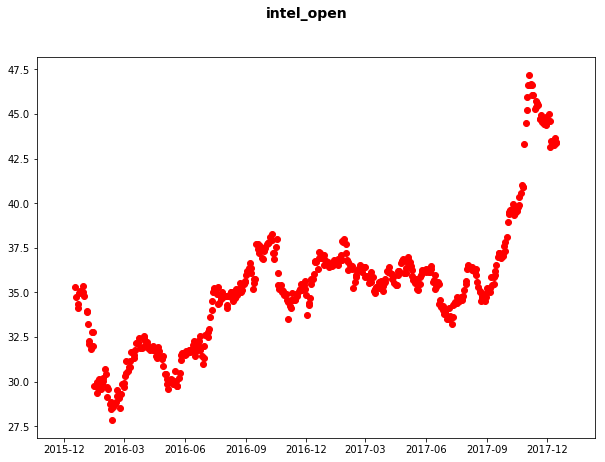

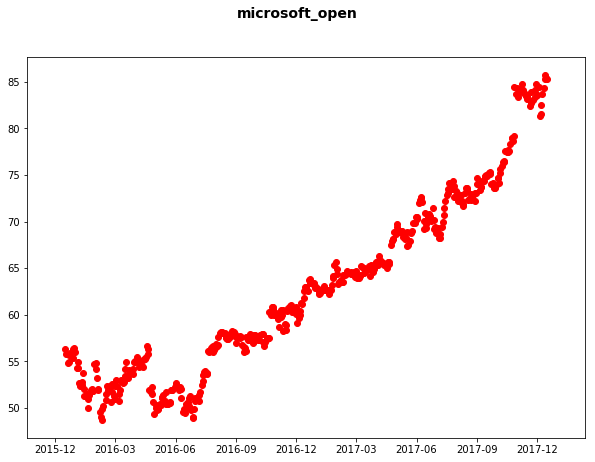

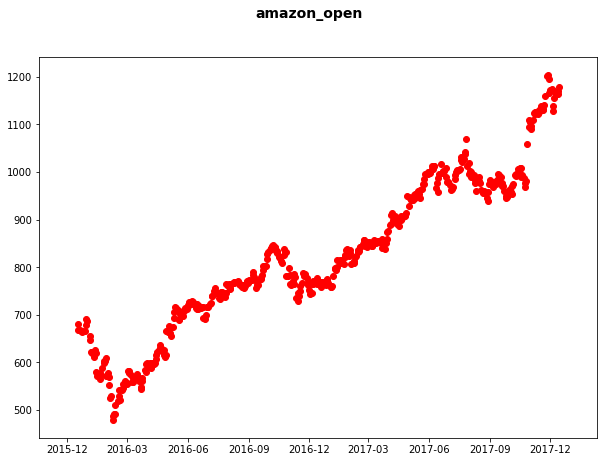

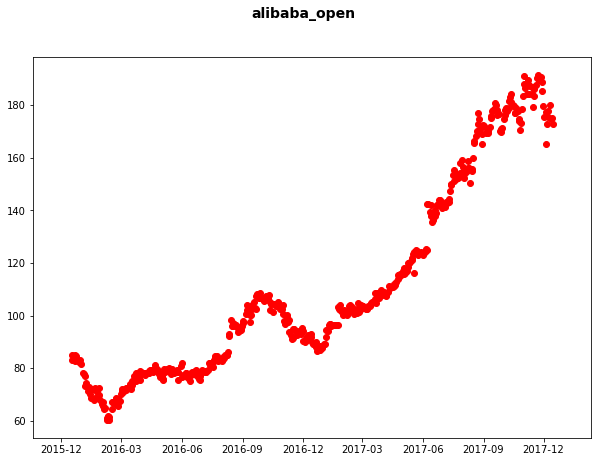

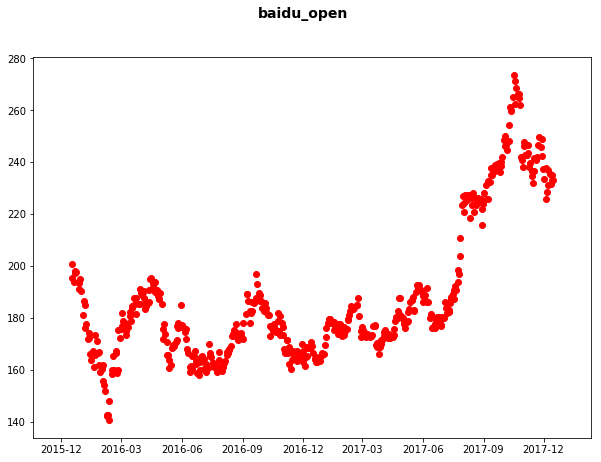

In [7]:
name_list_open = ['bitcoin_open', 'intel_open', 'microsoft_open', 'amazon_open', 'alibaba_open', 'baidu_open']
for i in name_list_open: 
    f, ax = plt.subplots(figsize=(10, 7))
    plt.scatter(x=stock_data.index, y=stock_data[i], c='r')
    plt.suptitle(i, fontsize=14, fontweight='bold')

Likewise, open prices of stocks show a similiar pattern; upward trend for the year 2017.

#### Correlation between stocks

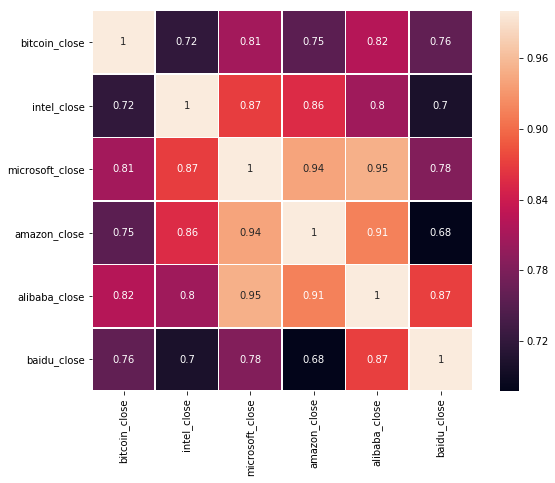

In [8]:
# Stocks close price correlation
corrmat = stock_data[name_list_close].corr()
f, ax = plt.subplots(figsize=(10, 7))
plt.xticks(rotation='90')
sns.heatmap(corrmat, square=True, linewidths=.5, annot=True)

Moderate to high correlation can be observed for several stock close price pairs. Highest being Alibaba-Microsoft, Amazon-Microsoft and Alibaba-Bitcoin.

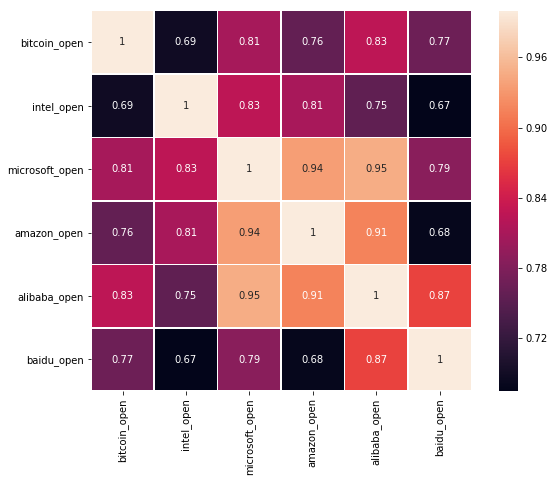

In [9]:
corrmat = stock_data[name_list_open].corr()
f, ax = plt.subplots(figsize=(10, 7))
plt.xticks(rotation='90')
sns.heatmap(corrmat, square=True, linewidths=.5, annot=True)

Likewise, moderate to high correlation can be observed for several stock open price pairs. Highest being Alibaba-Microsoft, Alibaba-Bitcoin and Amazon-Microsoft. 

#### Obtain logartihmic returns of stocks for both open and close prices

In [10]:
## use log to create stationary time series
log_return_data = pd.DataFrame()

for i in stock_data.columns:
    log_return_data[i + '_log_return'] = np.log(stock_data[i]/stock_data[i].shift())[1:]

log_return_data.head()

,bitcoin_open_log_return,bitcoin_close_log_return,intel_open_log_return,intel_close_log_return,microsoft_open_log_return,microsoft_close_log_return,amazon_open_log_return,amazon_close_log_return,alibaba_open_log_return,alibaba_close_log_return,baidu_open_log_return,baidu_close_log_return
Date,,,,,,,,,,,,
2015-12-18,-0.022153,0.000000,-0.016846,-0.030244,-0.010524,-0.028592,-0.016832,-0.009754,-0.021404,-0.010950,-0.026146,-0.025821
2015-12-21,-0.024457,-0.033623,-0.018013,0.010865,-0.016087,0.012849,-0.000224,0.000557,-0.000601,0.002658,-0.008938,0.028356
2015-12-22,-0.016365,-0.009217,0.007302,0.014209,0.002002,0.009439,-0.002501,-0.002049,-0.003132,0.023494,0.021895,-0.002079
2015-12-23,0.016529,0.010050,0.017025,0.007744,0.012829,0.008456,-0.000495,0.000829,0.025725,-0.000472,-0.003945,-0.002541
2015-12-24,0.030672,0.046884,0.003428,-0.000572,0.002868,-0.002691,-0.004737,-0.001372,-0.005778,-0.012937,0.001469,-0.013318


#### Plot out autocorrelation of logarithmic returns of stocks open and close

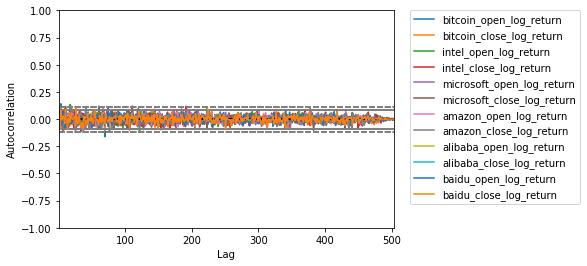

In [11]:
fig = plt.figure()
fig.set_figwidth(100)
fig.set_figheight(40)

plt.figure()

for i in log_return_data.columns:
    autocorrelation_plot(log_return_data[i], label = i)

_ = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Minimal autocorrelation observed (< 0.2) for all stocks' open and close prices.

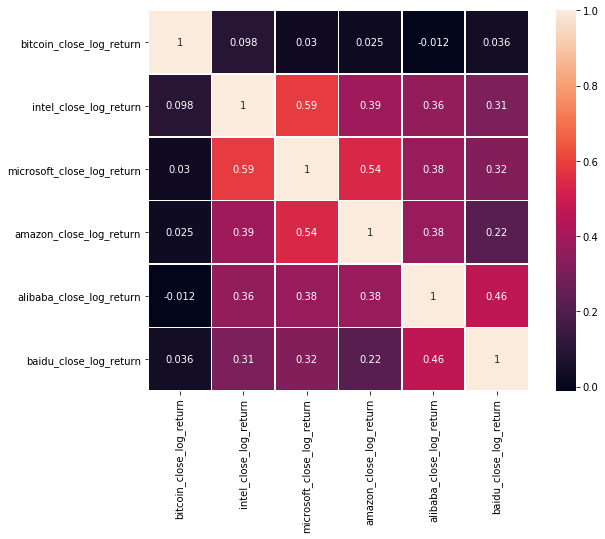

In [12]:
log_close_list = ['bitcoin_close_log_return', 'intel_close_log_return', 'microsoft_close_log_return', 'amazon_close_log_return', 'alibaba_close_log_return', 'baidu_close_log_return']
log_open_list = ['bitcoin_open_log_return', 'intel_open_log_return', 'microsoft_open_log_return', 'amazon_open_log_return', 'alibaba_open_log_return', 'baidu_open_log_return']
corrmat = log_return_data[log_close_list].corr()
f, ax = plt.subplots(figsize=(10, 7))
plt.xticks(rotation='90')
sns.heatmap(corrmat, square=True, linewidths=.5, annot=True)


Low (<= 0.3) to moderate (< 0.7) correlation observed between stocks' logarithmic returns for close prices

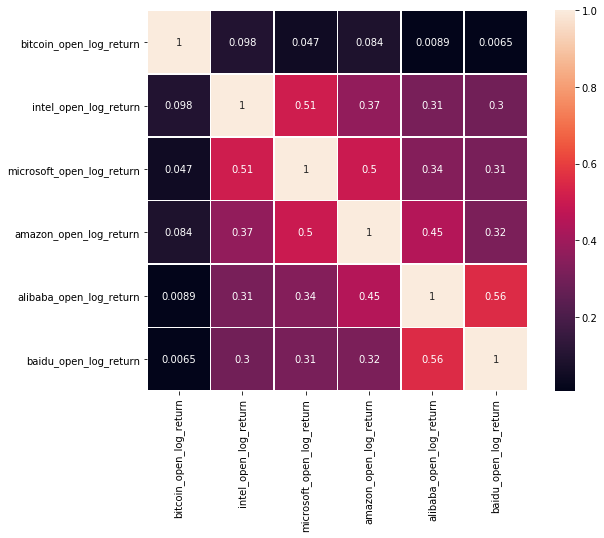

In [13]:
corrmat = log_return_data[log_open_list].corr()
f, ax = plt.subplots(figsize=(10, 7))
plt.xticks(rotation='90')
sns.heatmap(corrmat, square=True, linewidths=.5, annot=True)

Similiarly, low (<= 0.3) to moderate (< 0.7) correlation observed between stocks' logarithmic returns for open prices

## End of Exploratory Data Analysis (EDA)

## Start of Random Forest Predictive Model

### Feature engineering for Random Forest

In [14]:
# shift stock prices back by 1 day and subtract with unshifted dataframe to obtain difference
ytd_stock_data = stock_data.shift(1)
diff = stock_data - ytd_stock_data

# index slicing [1:] is used as first example will become all 0s upon shifting
# apply mapping function where all stocks that rose in price will become 1 and stocks that fell in price will become 0
directions = diff.applymap(lambda x: 1 if x > 0 else 0)[1:]
directions.head()

,bitcoin_open,bitcoin_close,intel_open,intel_close,microsoft_open,microsoft_close,amazon_open,amazon_close,alibaba_open,alibaba_close,baidu_open,baidu_close
Date,,,,,,,,,,,,
2015-12-18,0,0,0,0,0,0,0,0,0,0,0,0
2015-12-21,0,0,0,1,0,1,0,1,0,1,0,1
2015-12-22,0,0,1,1,1,1,0,0,0,1,1,0
2015-12-23,1,1,1,1,1,1,0,1,1,0,0,0
2015-12-24,1,1,1,0,1,0,0,0,0,0,1,0


In [15]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

# used series_to_supervised helper function to performing windowing of window size 60
windowed_data = series_to_supervised(directions, n_in=60)

### Model building, training and prediction
#### Ran in a loop to build a model for each stock for prediction

In [16]:
# counter to track stock's y-value index
counter = -12

# create dictionary to store model metrics
model_metrics = {}

# create dataframe to store next day's prediction metrics
next_day_pred = pd.DataFrame()
model_accuracy_ensem = {}
investor_accuracy_ensem = {}

for ticker in tickers:
    
    trimmed_data = windowed_data
    
    # train-test split (75-25)
    no_of_examples = len(trimmed_data)
    train = trimmed_data[:int(no_of_examples*0.80)]
    test = trimmed_data[int(no_of_examples*0.80):]
    
    # extract out current day stock prices + past 59 days stock prices to predict tomorrow's stock prices
    input_today_prices = trimmed_data.drop(trimmed_data.columns[0:12], axis=1)
    input_today_prices = input_today_prices.iloc[-1].values.reshape((1, input_today_prices.values.shape[1]))

    # split training and test dataset into their respective x and y
    train_x = train.iloc[:,:-(len(tickers)*2)]
    train_y = train.iloc[:,counter]
    test_x = test.iloc[:,:-(len(tickers)*2)]
    test_y = test.iloc[:,counter]
    
    # increaes counter so next for loop iteration will have counter pointing at the next stock's index
    counter+=2
    
    # Creating Random Forest Classifier
    # random_state = 0 to set random seed of 0 so that classifer will be consistent in building trees
    clf = RandomForestClassifier(n_estimators=300,criterion= 'gini', max_depth=None, min_samples_split=2, 
                                 #min_samples_leaf=50, 
                                 min_weight_fraction_leaf=0.0, max_features='auto', 
                                 max_leaf_nodes=None, min_impurity_decrease=1e-07, bootstrap=True, oob_score=False, 
                                 n_jobs=1, random_state=0, verbose=0, warm_start=False)

    # Training Random Forest Classifier
    clf.fit(train_x, train_y)
    
    # Use trained random forest model to predict test dataset's y
    yhat = clf.predict(test_x)
    
    # confusion matrix
    tn, fp, fn, tp = confusion_matrix(test_y, yhat).ravel()
    model_metrics[ticker+' confusion matrix'] = [str(tp), str(fp), str(tn), str(fn)]

    # model's accuracy
    model_metrics[ticker+' model accuracy'] = accuracy_score(test_y, yhat)
    model_accuracy_ensem[ticker] = accuracy_score(test_y, yhat)
    
    # investor's accuracy
    model_metrics[ticker+' investor accuracy'] = (tp+tn+fn)/(tp+tn+fp+fn)
    investor_accuracy_ensem[ticker]=(tp+tn+fn)/(tp+tn+fp+fn)
    
    # tomorrow's stock movement
    tmr_movement = clf.predict(input_today_prices)
    next_day_pred[ticker] = tmr_movement

#### Confusion matrices of the different stock models and their respective<br> Investor's Accuracy = [(tp+tn+fp)/(tp+fp+tn+fn)] &<br> Model Accuracy = [(tp+tn)/(tp+fp+tn+fn)]

In [17]:
model_metrics

{'alibaba confusion matrix': ['42', '22', '16', '9'],
 'alibaba investor accuracy': 0.7528089887640449,
 'alibaba model accuracy': 0.651685393258427,
 'amazon confusion matrix': ['44', '33', '7', '5'],
 'amazon investor accuracy': 0.6292134831460674,
 'amazon model accuracy': 0.5730337078651685,
 'baidu confusion matrix': ['37', '22', '19', '11'],
 'baidu investor accuracy': 0.7528089887640449,
 'baidu model accuracy': 0.6292134831460674,
 'bitcoin confusion matrix': ['41', '19', '15', '14'],
 'bitcoin investor accuracy': 0.7865168539325843,
 'bitcoin model accuracy': 0.6292134831460674,
 'intel confusion matrix': ['42', '24', '13', '10'],
 'intel investor accuracy': 0.7303370786516854,
 'intel model accuracy': 0.6179775280898876,
 'microsoft confusion matrix': ['48', '29', '9', '3'],
 'microsoft investor accuracy': 0.6741573033707865,
 'microsoft model accuracy': 0.6404494382022472}

In [18]:
model_accuracy_ensem

{'alibaba': 0.651685393258427,
 'amazon': 0.5730337078651685,
 'baidu': 0.6292134831460674,
 'bitcoin': 0.6292134831460674,
 'intel': 0.6179775280898876,
 'microsoft': 0.6404494382022472}

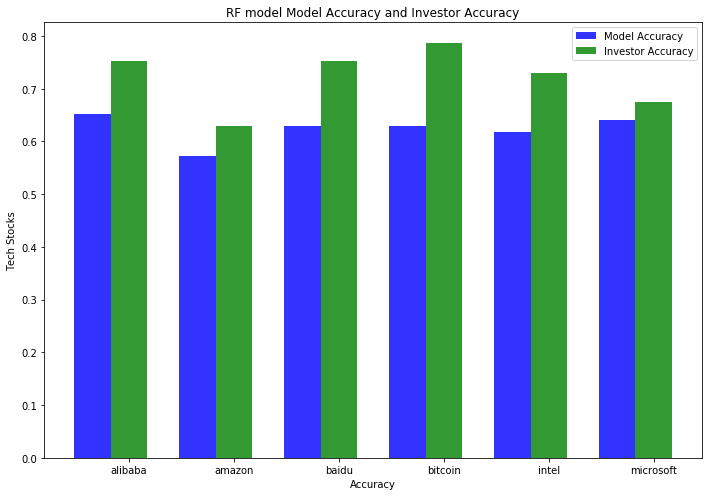

In [19]:
%matplotlib inline
y = ('alibaba', 'amazon', 'baidu', 'bitcoin', 'intel', 'microsoft')
x1 = []
x2 = []

for i in y:
    x1.append(model_accuracy_ensem[i])
    x2.append(investor_accuracy_ensem[i])
    

# y_pos = np.arange(len(y))
# width = 1/1.5
# plt.bar(y_pos, x, width, color="blue")
# plt.xticks(y_pos, y)
# plt.ylabel('Tech Stock')
# plt.title('RF Model Accuracy Bar Chart')

n_groups = 6


 
# create plot
fig, ax = plt.subplots(figsize=(10, 7))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, x1, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Model Accuracy')
 
rects2 = plt.bar(index + bar_width, x2, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Investor Accuracy')
 
plt.xlabel('Accuracy')
plt.ylabel('Tech Stocks')
plt.title('RF model Model Accuracy and Investor Accuracy')
plt.xticks(index + bar_width, y)
plt.legend()
 
plt.tight_layout()
plt.show()

#### Prediction dataframe for the various stocks <br> 1: Upward stock movement<br>0: Downward stock movement

In [20]:
next_day_pred

,bitcoin,intel,microsoft,amazon,alibaba,baidu
0,1,1,1,1,0,1


## End of Random Forest Predictive Model